In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.12.0


In [3]:
hello = tf.constant("Hello ")

In [4]:
world = tf.constant("World")

In [5]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [6]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [7]:
#### in order to show the value, need to put it into a session
with tf.Session() as sess:
    result = sess.run(hello+world)

In [8]:
print(result)

b'Hello World'


In [9]:
#### addition
a = tf.constant(10)
b = tf.constant(20)
a + b

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [10]:
with tf.Session() as sess:
    result = sess.run(a+b)

In [11]:
result

30

In [12]:
const = tf.constant(10)
fill_mat = tf.fill((4,4),10)
myzeros = tf.zeros((4,4))
myones = tf.ones((4,4))

In [13]:
myrandn = tf.random_normal((4,4), mean=0, stddev=1.0)

In [15]:
myrandu = tf.random_uniform((4,4),minval=0,maxval=1)

In [16]:
my_ops = [const,fill_mat,myzeros,myones,myrandn,myrandu]

In [17]:
sess = tf.InteractiveSession()

In [19]:
for op in my_ops:
#     print(sess.run(op))
    print(op.eval())
    print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[ 0.3154193  -1.6501172   2.28142    -1.3864752 ]
 [-0.948543   -1.3748206  -0.2900221   0.12287086]
 [-0.18590927 -0.8411768   0.34753323  0.7501318 ]
 [-2.0735328  -0.04528048 -0.75009525  1.5738426 ]]


[[0.8039398  0.1634711  0.8469242  0.90520966]
 [0.94144964 0.6902379  0.89221954 0.04085803]
 [0.43391085 0.78840816 0.23451817 0.5739771 ]
 [0.02424812 0.84865606 0.623701   0.85266566]]




In [20]:
a = tf.constant([
    [1,2],[3,4]
])

In [21]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [22]:
b = tf.constant([
    [10],[100]
])

In [23]:
result = tf.matmul(a,b)
sess.run(result)

array([[210],
       [430]], dtype=int32)

In [24]:
#### default graph has been created, you can create new ones
print(tf.get_default_graph())

In [25]:
g = tf.Graph()
print(g)

In [26]:
#### set the graph to default
graph_one = tf.get_default_graph()
print(graph_one)

In [27]:
graph_two = tf.Graph()
print(graph_two)

In [28]:
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


In [29]:
print(graph_two is tf.get_default_graph())

False


#### variables (variable needs to be initialized)

In [30]:
my_tensor = tf.random_uniform((4,4),0,1)
my_tensor

<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [31]:
my_var = tf.Variable(initial_value=my_tensor)
print(my_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>


In [48]:
init = tf.global_variables_initializer()
sess.run(init)

In [33]:
sess.run(my_var)

array([[0.5916332 , 0.9000784 , 0.9872874 , 0.81644726],
       [0.3232044 , 0.9414096 , 0.5056788 , 0.30060315],
       [0.91187215, 0.20409441, 0.3511802 , 0.3260578 ],
       [0.98842   , 0.03411055, 0.7933806 , 0.45794654]], dtype=float32)

#### placeholders

In [34]:
ph = tf.placeholder(tf.float32, shape=(None,5))

In [36]:
import numpy as np

In [37]:
np.random.seed(101)
tf.set_random_seed(101)

In [38]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [39]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [40]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [41]:
add_op = a + b
nul_op = a + b

add_result = sess.run(add_op, feed_dict={a:10, b:20})
print(add_result)

30.0


In [42]:
add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
print(add_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


#### Example neural net

In [43]:
n_features = 10
n_dense_neurons = 3

x = tf.placeholder(tf.float32,(None,n_features))
W = tf.Variable(tf.random_normal((n_features,n_dense_neurons)))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [44]:
xW = tf.matmul(x,W)
Z = tf.add(xW,b)

In [46]:
a = tf.sigmoid(Z)

In [49]:
sess.run(init)
layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [50]:
print(layer_out)

[[0.24570188 0.36102208 0.59307605]]


#### simple regression

In [51]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [52]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([-0.17289561,  2.24387308,  3.57001461,  3.26783558,  4.32780247,
        5.96742265,  6.14049066,  6.63051206,  7.54219188, 10.41297596])

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

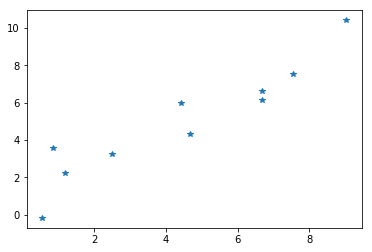

In [55]:
plt.plot(x_data,y_label,'*')
plt.show()

In [56]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

error = 0

for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [57]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [58]:
init = tf.global_variables_initializer()

In [59]:
sess.run(init)

training_steps = 1
for i in range(training_steps):
    sess.run(train)

final_slope, final_intercept = sess.run([m,b])

In [60]:
final_slope,final_intercept

(0.71209025, 0.9136496)

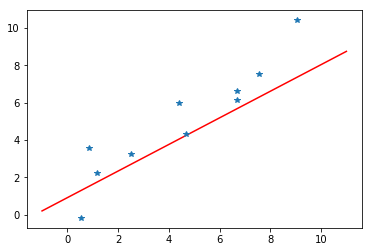

In [61]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot,'r')
plt.plot(x_data, y_label, '*')
plt.show()